In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Datos.csv')

In [3]:
df.head(16)

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,place,type
0,1,1950-01-29T05:21:16.030Z,34.000833,-117.568167,0.54,2.52,ml,8.0,121.0,0.16030,0.35,ci,"5km W of Mira Loma, CA",earthquake
1,2,1950-01-28T22:45:12.670Z,35.860333,-117.636833,6.00,1.95,mh,2.0,186.0,0.05478,0.55,ci,"23km WNW of Searles Valley, CA",earthquake
2,3,1950-01-28T22:36:21.460Z,35.836333,-117.665500,0.02,2.45,ml,6.0,130.0,0.05895,0.79,ci,"24km N of Ridgecrest, CA",earthquake
3,4,1950-01-28T12:10:04.690Z,35.700000,-118.025500,6.00,2.00,mh,2.0,297.0,0.36680,0.37,ci,"20km WNW of Inyokern, CA",earthquake
4,5,1950-01-28T07:42:38.200Z,33.964833,-116.451333,15.00,2.83,ml,7.0,277.0,0.67620,0.64,ci,"5km E of Desert Hot Springs, CA",earthquake
5,6,1950-01-27T22:09:38.780Z,33.292000,-116.335333,6.00,2.80,ml,5.0,317.0,0.44580,0.26,ci,"6km NE of Borrego Springs, CA",earthquake
6,7,1950-01-27T20:36:58.900Z,33.270500,-116.351000,6.00,3.30,ml,8.0,264.0,0.43640,0.55,ci,"3km NE of Borrego Springs, CA",earthquake
7,9,1950-01-27T15:01:25.470Z,34.452500,-118.997833,6.00,2.37,ml,5.0,286.0,0.74860,0.51,ci,"9km NW of Fillmore, CA",earthquake
8,13,1950-01-25T10:34:03.510Z,34.385667,-118.904500,6.00,3.19,ml,9.0,162.0,0.65180,0.81,ci,"2km SE of Fillmore, CA",earthquake
9,14,1950-01-24T21:57:01.130Z,34.383833,-118.912500,6.00,3.85,ml,7.0,164.0,0.65730,0.62,ci,"2km SSE of Fillmore, CA",earthquake


In [4]:
df.shape

(639152, 14)

In [5]:
df.dtypes

Unnamed: 0      int64
time           object
latitude      float64
longitude     float64
depth         float64
mag           float64
magType        object
nst           float64
gap           float64
dmin          float64
rms           float64
net            object
place          object
type           object
dtype: object

In [6]:
indices = [639147, 1, 639151, 639149]
muestras = pd.DataFrame(df.loc[indices],
                        columns = df.keys()).reset_index(drop = True)

df = df.drop(indices, axis = 0)

In [7]:
df = df.drop(['Unnamed: 0', 'time', 'latitude', 'longitude', 'magType', 'net',
              'place', 'type'], axis = 1)

muestras = muestras.drop(['Unnamed: 0', 'time', 'latitude', 'longitude',
                          'magType', 'net','place', 'type']
                         , axis = 1)

In [8]:
df.head()

,depth,mag,nst,gap,dmin,rms
0,0.54,2.52,8.0,121.0,0.16030,0.35
2,0.02,2.45,6.0,130.0,0.05895,0.79
3,6.00,2.00,2.0,297.0,0.36680,0.37
4,15.00,2.83,7.0,277.0,0.67620,0.64
5,6.00,2.80,5.0,317.0,0.44580,0.26


In [9]:
df_escalada = preprocessing.Normalizer().fit_transform(df)

muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

X = df_escalada.copy()

muestras_finales = muestras_escalada.copy()

In [10]:
df_escalada

array([[4.45205990e-03, 2.07762795e-02, 6.59564429e-02, 9.97591199e-01,
        1.32160222e-03, 2.88559438e-03],
       [1.53652481e-04, 1.88224289e-02, 4.60957442e-02, 9.98741124e-01,
        4.52890687e-04, 6.06927299e-03],
       [2.01969525e-02, 6.73231750e-03, 6.73231750e-03, 9.99749148e-01,
        1.23470703e-03, 1.24547874e-03],
       ...,
       [1.29679993e-01, 3.98423703e-02, 7.99924037e-01, 5.84559873e-01,
        3.67195899e-04, 2.61513628e-03],
       [3.36135251e-02, 1.08318012e-02, 1.04823883e-02, 9.99321015e-01,
        5.55566578e-04, 3.49412942e-04],
       [4.47881207e-02, 1.34364362e-02, 1.34364362e-01, 9.89817468e-01,
        3.13068964e-03, 3.35910905e-03]])

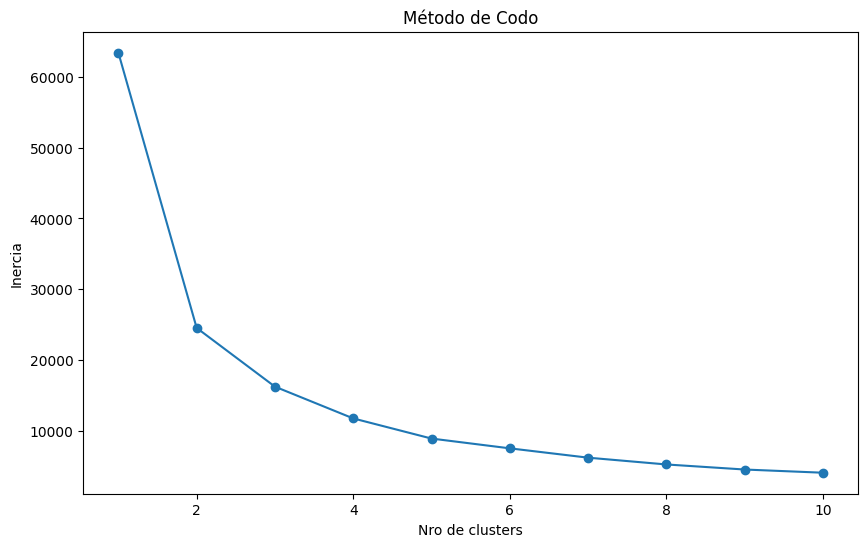

In [11]:
lista = []

for i in range(1, 11):
  algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 300, n_init = 10)
  algoritmo.fit(X)
  lista.append(algoritmo.inertia_)

plt.figure(figsize = [10, 6])
plt.title('Método de Codo')
plt.xlabel('Nro de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 11)), lista, marker = 'o')
plt.show()

In [12]:
algoritmo = KMeans(n_clusters = 3, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

algoritmo.fit(X)

KMeans(n_clusters=3)

In [13]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

muestras_prediccion = algoritmo.predict(muestras_finales)

In [14]:
for i, pred in enumerate(muestras_prediccion):
  print('Muestra', i, 'se encuentra en el clúster:', pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 0


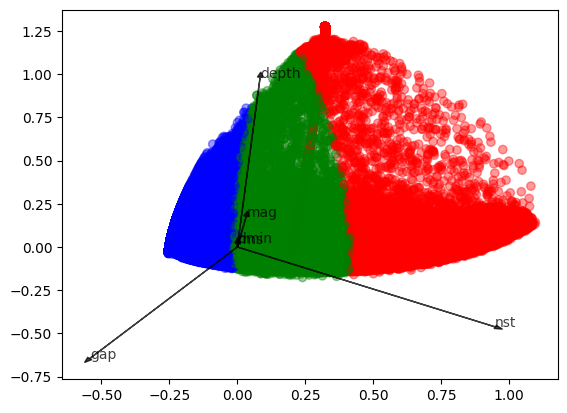

In [15]:
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

centroides_pca = modelo_pca.transform(centroides)

colores = ['blue', 'red', 'green']

colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.columns

for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()